In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [2]:
# import danych
d = pd.read_excel("dane.xlsx")

In [3]:
d.head()

,lp,numer_grupy,kalibracja,szerokosc,ksiazki,portale,fastfood,pieniadze,sport
0,1,1,niska,waska,5,4,1,3,5
1,2,1,niska,waska,1,5,1,4,1
2,3,1,niska,waska,1,5,5,5,2
3,4,1,niska,waska,5,4,2,2,5
4,5,1,niska,waska,5,2,1,1,1


# Analiza statystyczna

To jest do wklejenia na koniec rozdziału metody, uzupełnijcie tylko nazwy zmiennych zależnych ZZ i niezależnych ZN.
    
> W celu zbadania wpływu ZN na ZZ wykonano dwuczynnikową analizę wariancji w schemacie 2x2. Wszystkie obliczenia wykonano w języku Python przy użyciu bibliotek _Pandas, Numpy i Statsmodels_. Wykresy przygotowano przy użyciu biblioteki _Seaborn_.

# Średnie i odchylenia

In [4]:
gr = d.groupby(['kalibracja', 'szerokosc'])

#### Średnie w grupach:

Książki:

In [5]:
round(gr.ksiazki.mean(), 2)

kalibracja  szerokosc
niska       szeroka      3.68
            waska        3.80
wysoka      szeroka      2.24
            waska        2.96
Name: ksiazki, dtype: float64

Portale:

In [6]:
round(gr.portale.mean(), 2)

kalibracja  szerokosc
niska       szeroka      1.92
            waska        2.80
wysoka      szeroka      1.32
            waska        1.80
Name: portale, dtype: float64

Fast-food:

In [7]:
round(gr.fastfood.mean(), 2)

kalibracja  szerokosc
niska       szeroka      2.00
            waska        2.04
wysoka      szeroka      1.48
            waska        1.44
Name: fastfood, dtype: float64

Pieniądze:

In [8]:
round(gr.pieniadze.mean(), 2)

kalibracja  szerokosc
niska       szeroka      3.00
            waska        3.28
wysoka      szeroka      1.36
            waska        2.36
Name: pieniadze, dtype: float64

Sport:

In [9]:
round(gr.sport.mean(), 2)

kalibracja  szerokosc
niska       szeroka      2.04
            waska        2.68
wysoka      szeroka      1.20
            waska        1.48
Name: sport, dtype: float64

#### Odchylenia standardowe:

Książki:

In [10]:
round(gr.ksiazki.std(), 2)

kalibracja  szerokosc
niska       szeroka      1.44
            waska        1.80
wysoka      szeroka      1.64
            waska        1.72
Name: ksiazki, dtype: float64

Portale:

In [11]:
round(gr.portale.std(), 2)

kalibracja  szerokosc
niska       szeroka      1.08
            waska        1.44
wysoka      szeroka      0.48
            waska        1.12
Name: portale, dtype: float64

Fast-food:

In [12]:
round(gr.fastfood.std(), 2)

kalibracja  szerokosc
niska       szeroka      1.15
            waska        1.43
wysoka      szeroka      1.00
            waska        1.04
Name: fastfood, dtype: float64

Pieniądze:

In [13]:
round(gr.pieniadze.std(), 2)

kalibracja  szerokosc
niska       szeroka      1.26
            waska        1.37
wysoka      szeroka      0.57
            waska        1.66
Name: pieniadze, dtype: float64

Sport:

In [14]:
round(gr.sport.std(), 2)

kalibracja  szerokosc
niska       szeroka      1.31
            waska        1.46
wysoka      szeroka      0.41
            waska        0.65
Name: sport, dtype: float64

# Wykresy

Poniżej wykresy gotowe do wklejenia do artykułu. Pliki png w wysokiej rozdzielczości w załączniku.

### Książki

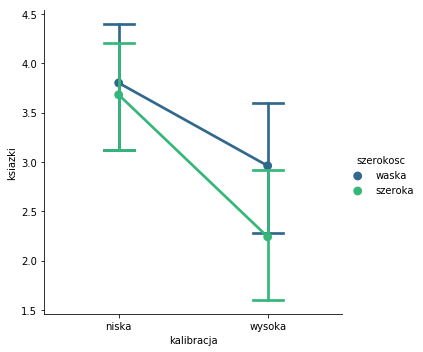

In [15]:
sns.catplot(x='kalibracja', y='ksiazki',hue='szerokosc', data=d,
            kind='point', capsize=.2, palette='viridis')
plt.savefig('ksiazki.png', dpi=150)

### Portale

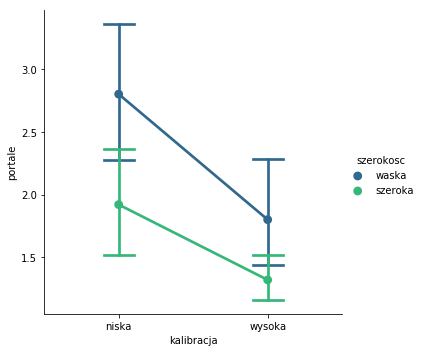

In [16]:
sns.catplot(x='kalibracja', y='portale',hue='szerokosc', data=d,
            kind='point', capsize=.2, palette='viridis')
plt.savefig('portale.png', dpi=150)

### Fast-food

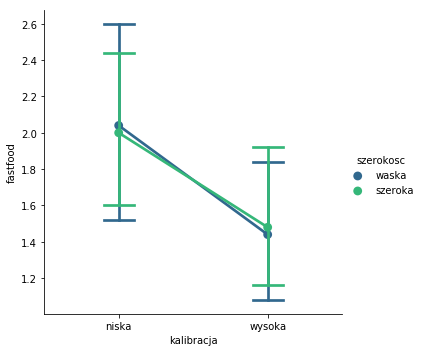

In [17]:
sns.catplot(x='kalibracja', y='fastfood',hue='szerokosc', data=d,
            kind='point', capsize=.2, palette='viridis')
plt.savefig('fastfood.png', dpi=150)

### Pieniądze

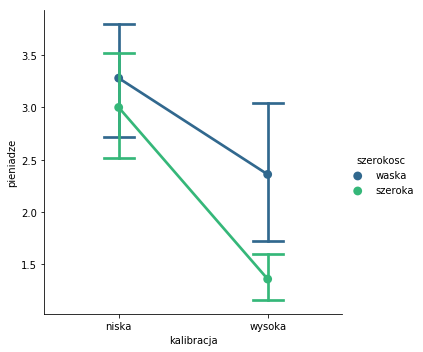

In [18]:
sns.catplot(x='kalibracja', y='pieniadze',hue='szerokosc', data=d,
            kind='point', capsize=.2, palette='viridis')
plt.savefig('pieniadze.png', dpi=150)

### Sport

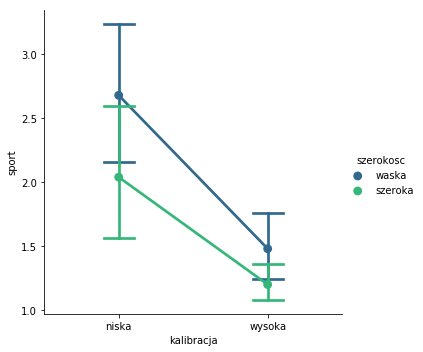

In [19]:
sns.catplot(x='kalibracja', y='sport',hue='szerokosc', data=d,
            kind='point', capsize=.2, palette='viridis')
plt.savefig('sport.png', dpi=150)

# ANOVA 2x2

W poniższych tabelach przedstawione są efekty głowne (kalibracja i szerokość) i efekt interakcji dla każdej z badanych zmiennych zależnych. Kolumna df mówi o stopniach swobody, F o wartości statystyki F a PR(>F) to wasz poziom istotności p. Jeśli p jest mniejsze niż 0.05, mówimy że dany efekt jest _istotny statystycznie_.

W rozdziale wynikowym opiszcie wszystkie średnie (patrz wyżej), pokażcie wszystkie wykresy, a w tekście dla każdego efektu dopiszcie opis, wg poniższego schematu:

> Efekt główny/interakcji ZN na ZZ okazał się istotny/nieistotny statystycznie; F(_df_, _dfR_) = _F_, p < PR(>F).

Gdzie _df_ bierzecie z kolumny `df` a _dfR_ to `df` dla `Residual`. Czyli przykładowo dla książek:

> Efekt główny kalibracji dla oceny książek okazał się istotny statystycznie; F(1, 96) = 11,862, p < 0,001. Efekt główny szerokości dla oceny książek okazał się nieistotny statystycznie; F(1, 96) = 1,610, p > 0,05. Efekt interakcji kalibracji i szerokości okazał się nieistotny statystycznie; F(1, 96) = 0,821, p > 0,05.

### Książki

In [26]:
form = 'ksiazki ~ kalibracja + szerokosc + kalibracja:szerokosc'
model = smf.ols(formula=form, data=d).fit()          
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
kalibracja,32.49,1.0,11.861272,0.000851
szerokosc,4.41,1.0,1.609979,0.207563
kalibracja:szerokosc,2.25,1.0,0.821418,0.367035
Residual,262.96,96.0,NaN,NaN


### Fast-food

In [28]:
form = 'fastfood ~ kalibracja + szerokosc + kalibracja:szerokosc'
model = smf.ols(formula=form, data=d).fit()          
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
kalibracja,7.840000e+00,1.0,5.729598e+00,0.018625
szerokosc,1.415709e-29,1.0,1.034623e-29,1.000000
kalibracja:szerokosc,4.000000e-02,1.0,2.923264e-02,0.864603
Residual,1.313600e+02,96.0,NaN,NaN


### portale

In [30]:
form = 'portale ~ kalibracja + szerokosc + kalibracja:szerokosc'
model = smf.ols(formula=form, data=d).fit()          
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
kalibracja,16.00,1.0,13.559322,0.000382
szerokosc,11.56,1.0,9.796610,0.002316
kalibracja:szerokosc,1.00,1.0,0.847458,0.359580
Residual,113.28,96.0,NaN,NaN


### Pieniądze

In [31]:
form = 'pieniadze ~ kalibracja + szerokosc + kalibracja:szerokosc'
model = smf.ols(formula=form, data=d).fit()          
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
kalibracja,40.96,1.0,25.115994,0.000002
szerokosc,10.24,1.0,6.278998,0.013900
kalibracja:szerokosc,3.24,1.0,1.986714,0.161916
Residual,156.56,96.0,NaN,NaN


### Sport

In [32]:
form = 'sport ~ kalibracja + szerokosc + kalibracja:szerokosc'
model = smf.ols(formula=form, data=d).fit()          
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
kalibracja,26.01,1.0,23.414854,0.000005
szerokosc,5.29,1.0,4.762191,0.031531
kalibracja:szerokosc,0.81,1.0,0.729182,0.395274
Residual,106.64,96.0,NaN,NaN
